In [1]:
import laspy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clr

In [2]:
%matplotlib notebook

In [11]:
inFile = laspy.file.File("/Users/vasilii.mosin/Desktop/ForestHype/data/lidar/thd_000026.las", mode= "r")

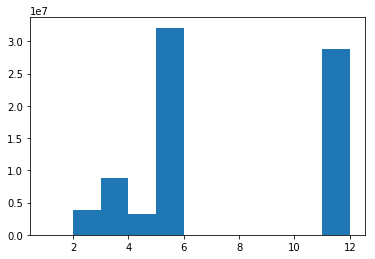

In [25]:
plt.hist(inFile.Classification, 11)
plt.show()

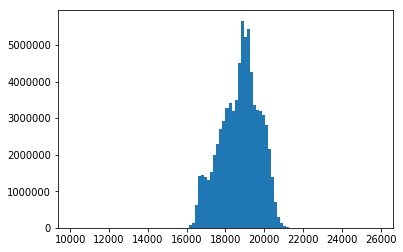

In [24]:
plt.hist(inFile.Z, 100)
plt.show()

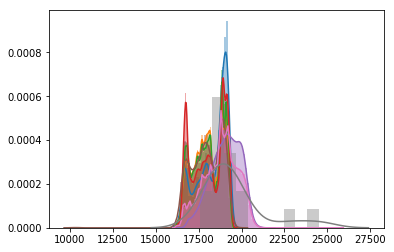

In [44]:
sns.distplot(inFile.Z[np.where(inFile.Classification==1)])
sns.distplot(inFile.Z[np.where(inFile.Classification==2)])
sns.distplot(inFile.Z[np.where(inFile.Classification==3)])
sns.distplot(inFile.Z[np.where(inFile.Classification==4)])
sns.distplot(inFile.Z[np.where(inFile.Classification==5)])
sns.distplot(inFile.Z[np.where(inFile.Classification==7)])
sns.distplot(inFile.Z[np.where(inFile.Classification==11)])
sns.distplot(inFile.Z[np.where(inFile.Classification==12)])
plt.show()

## Example Crown Delineation

In [3]:
import rasterio
from thresholding_watershed import itcd as itcd_tw
from skimage.exposure import rescale_intensity
from to_shapefile import crowns_segments

In [46]:
dataset = rasterio.open('../data/lidar/chm_40cm_gaussian.tif')

In [47]:
image = dataset.read(1)
image = rescale_intensity(image)

<IPython.core.display.Javascript object>


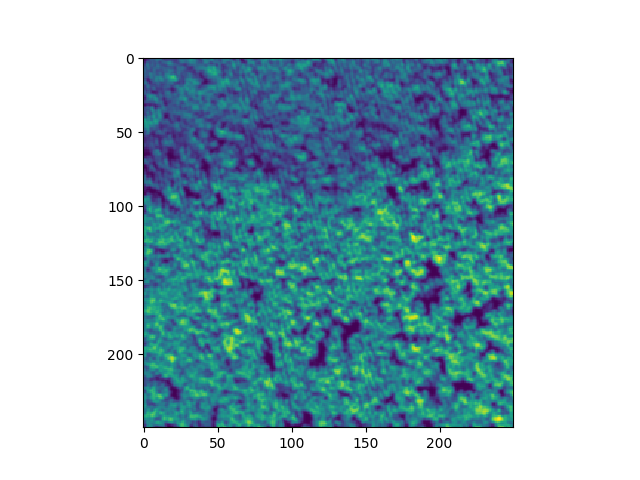

In [49]:
plt.imshow(image)
plt.show()

In [50]:
crowns_tw = itcd_tw(image, min_distance=1, smoothing=2, thres_coef=0.6)

In [51]:
cmap = clr.ListedColormap(np.random.rand(1000,3))

<IPython.core.display.Javascript object>


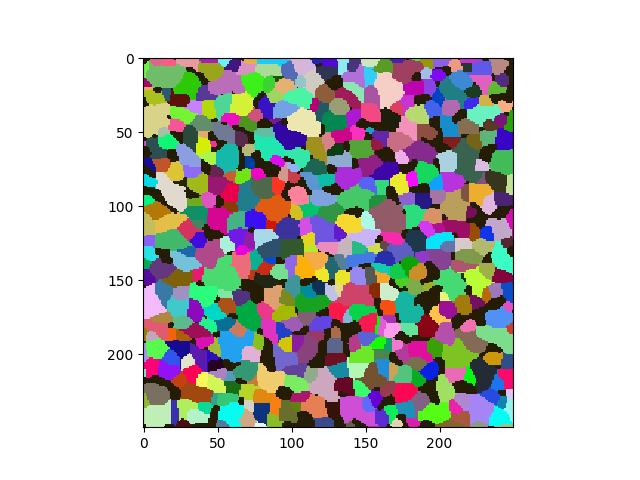

In [52]:
plt.imshow(crowns_tw, cmap)
plt.show()

In [53]:
crowns_segments('test_shape/crowns_gaussian', crowns_tw, dataset)